In [1]:
import os 
import sys
import glob 
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib.pyplot as plt 

In [2]:
from tqdm import tqdm
from MDAnalysis.analysis import distances

In [3]:
sys.path.append('../py_modules/')
from utils import triu_to_full

In [4]:
ep_6w63 = '../../3CLPro_6w63'
ep_7bqy = '../../3CLPro_7bqy'

In [5]:
df = pd.read_csv(ep_6w63, header=None, delim_whitespace=True, comment='#')
df = df.dropna(axis=1, how='all')

In [6]:
data = []
for lname in tqdm(df.iloc[:10,0]): 
    top = f'../../6w63/{lname}/fe/build/com-wat3.top'
    dcds = sorted(glob.glob(f'../../6w63/{lname}/replicas/*/simulation/com_wat3.dcd'))

    mda_traj = mda.Universe(top, dcds) 
    protein_ca = mda_traj.select_atoms('protein and name CA')
    for ts in mda_traj.trajectory: 
        dist = distances.self_distance_array(
                    protein_ca.positions, 
                    box=protein_ca.dimensions)
        cm = (dist < 8) * 1
        data.append({"sys": lname, 
                     "index": ts.frame, 
                     "contact_map": cm})

100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


In [7]:
sim_df = pd.DataFrame(data)
sim_df

,sys,index,contact_map
0,l0,0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,l0,1,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,l0,2,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,l0,3,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,l0,4,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
2395,l18,235,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2396,l18,236,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2397,l18,237,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2398,l18,238,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


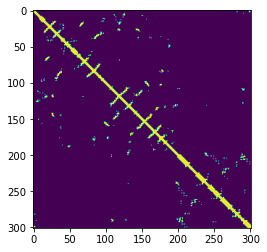

In [8]:
plt.imshow(triu_to_full(cm))

In [9]:
triu_to_full(cm).shape

(301, 301)

In [10]:
sim_df.to_pickle('contact_map.pkl')

In [11]:
a = True
sys.getsizeof(a)

28

In [12]:
a = 1
sys.getsizeof(a)

28

In [13]:
a = 1.0
sys.getsizeof(a)

24